# Qiskit Machine Learning - Simple Classifier

## Variational Quantum Classifier

Training Data  data-encoding  ansatz
----------------------------------------------------
                     |
                     V
                    VQC
                     |
                     V
                   Result

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit.ml.datasets import ad_hoc_data

from qiskit import QuantumRegister, QuantumCircuit
from qiskit.aqua.algorithms import VQC
from qiskit.aqua.components.optimizers import SPSA

from qiskit import Aer
from qiskit.aqua import QuantumInstance
import matplotlib.patches as mpatches

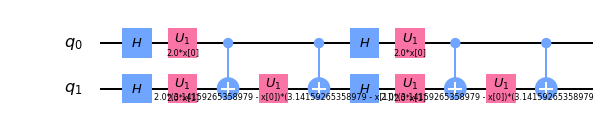

In [2]:
#Create data preparation circuit
data_prep_circuit = ZZFeatureMap(2)
data_prep_circuit.draw('mpl')

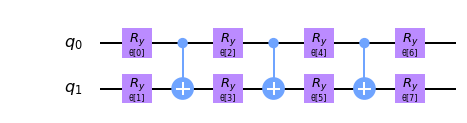

In [5]:
#Create Ansatz (the one being trained) Circuit
classifier = RealAmplitudes(2)
classifier.draw('mpl')

<ipython-input-7-2442f6f50b0b>:12: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(data[:,0],data[:,1], facecolor='', edgecolor='tab:blue',label=label, s=60, marker=marker)


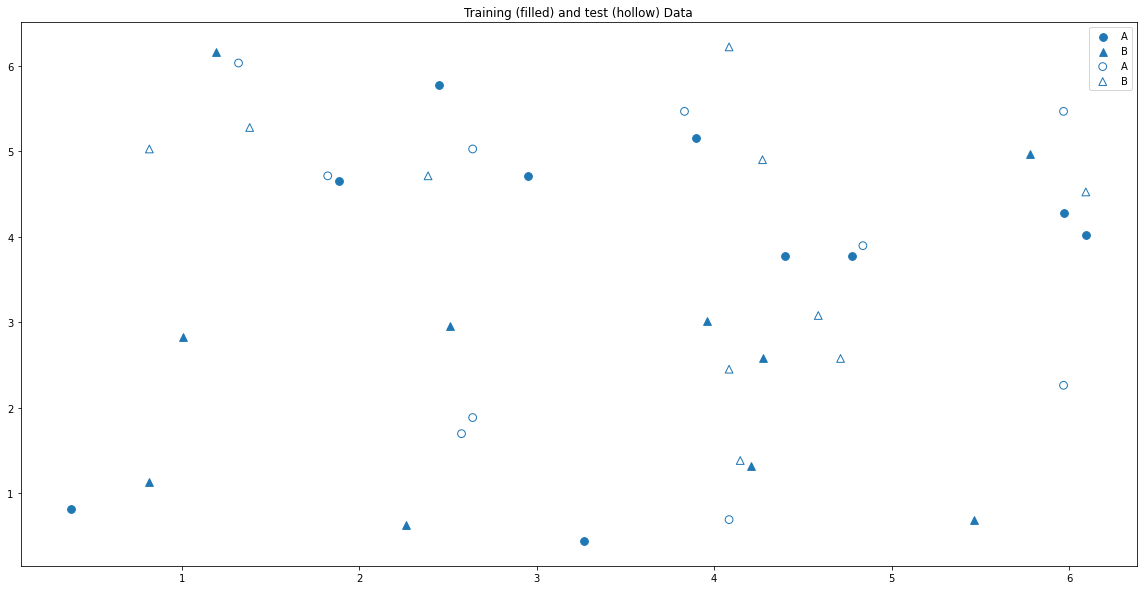

In [7]:
#Create and Visualize Data
#First, we need to load the k-dimensional training data samples
_, train, test, _ = ad_hoc_data(10,10,2,0.2)

#Visualize Data
markers = ['o', '^']
plt.figure(figsize=(20,10))
plt.title('Training (filled) and test (hollow) Data')
for marker, (label, data) in zip(markers,train.items()):
    plt.scatter(data[:,0],data[:,1], color='tab:blue',label=label, s=60, marker=marker)
for marker, (label, data) in zip(markers,test.items()):
    plt.scatter(data[:,0],data[:,1], facecolor='', edgecolor='tab:blue',label=label, s=60, marker=marker)
plt.legend(loc='best')

In [10]:
# Initialize the Optimizer
optimizer = SPSA(max_trials=100)
vqc = VQC(optimizer, data_prep_circuit, classifier, train)

In [13]:
# Obtain backend
backend = Aer.get_backend('qasm_simulator')

#Run VQC on this backend
results = vqc.run(backend)

TypeError: 'dict' object is not callable

In [14]:
print('Loss : ',results['training_loss'])

Loss :  0.35305932034400966


In [15]:
points_A = test['A']
points_B = test['B']
_, predicted_A = vqc.predict(points_A)
_, predicted_B = vqc.predict(points_B)
print('Score : ',sum(predicted_A==0)+sum(predicted_B==1), '/', (len(predicted_A)+len(predicted_B)))

Score :  18 / 20


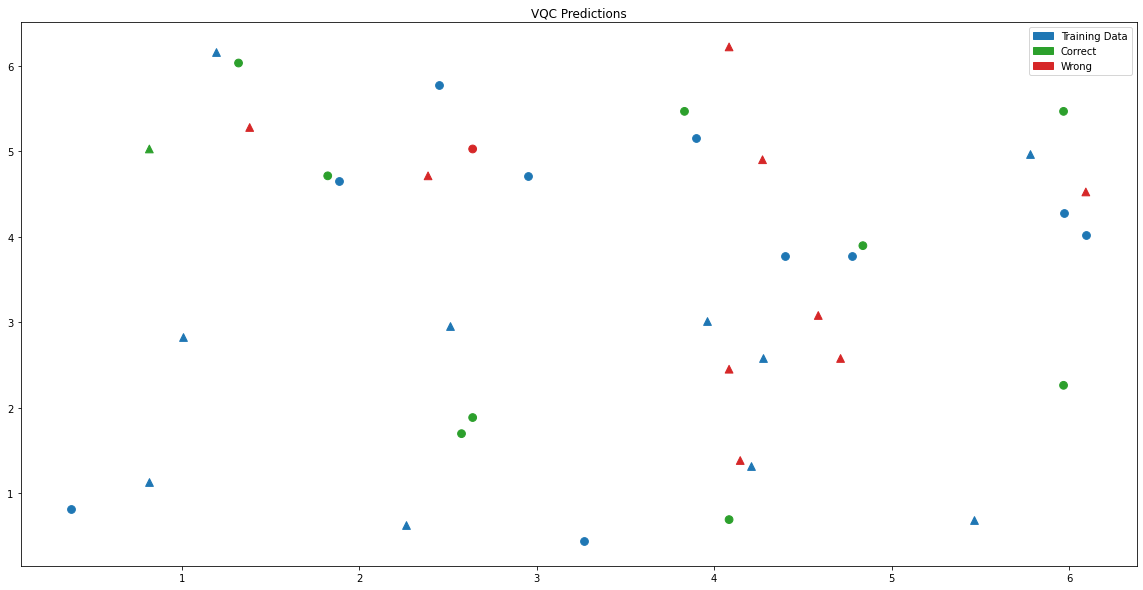

In [17]:
plt.figure(figsize=(20,10))
plt.title('VQC Predictions')
plt.scatter(points_A[:,0],points_A[:,1],s=60, marker='o', 
            color=['tab:green' if label==0 else 'tab:red' for label in predicted_A])
plt.scatter(points_B[:,0],points_B[:,1],s=60, marker='^', 
            color=['tab:green' if label==1 else 'tab:red' for label in predicted_A])

for marker, (label, data) in zip(markers,train.items()):
    plt.scatter(data[:,0],data[:,1], color='tab:blue',label=label, s=60, marker=marker)

train =  mpatches.Patch(color='tab:blue', label='Training Data')   
correct = mpatches.Patch(color='tab:green', label='Correct')
error = mpatches.Patch(color='tab:red', label='Wrong')
plt.legend(handles=[train, correct, error])
